# Statistics and Probability Review

In [13]:
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import pandas as pd

# OLS.r

In [ ]:
library(tidyverse)

set.seed(1)
tb <- tibble(
  x = rnorm(10000),
  u = rnorm(10000),
  y = 5.5*x + 12*u
) 

reg_tb <- tb %>% 
  lm(y ~ x, .) %>%
  print()

reg_tb$coefficients

tb <- tb %>% 
  mutate(
    yhat1 = predict(lm(y ~ x, .)),
    yhat2 = 0.0732608 + 5.685033*x, 
    uhat1 = residuals(lm(y ~ x, .)),
    uhat2 = y - yhat2
  )

summary(tb[-1:-3])

tb %>% 
  lm(y ~ x, .) %>% 
  ggplot(aes(x=x, y=y)) + 
  ggtitle("OLS Regression Line") +
  geom_point(size = 0.05, color = "black", alpha = 0.5) +
  geom_smooth(method = lm, color = "black") +
  annotate("text", x = -1.5, y = 30, color = "red", 
           label = paste("Intercept = ", -0.0732608)) +
  annotate("text", x = 1.5, y = -30, color = "blue", 
           label = paste("Slope =", 5.685033))

In [9]:
np.random.seed(1)
x = stats.norm().rvs(10000)
u = stats.norm().rvs(10000)
y = 5.5*x + 12*u
df = pd.DataFrame({"x":x, "u":u, "y":y})
df.head()

,x,u,y
0,1.624345,-0.122474,7.464213
1,-0.611756,0.228170,-0.626622
2,-0.528172,-0.352305,-7.132606
3,-1.072969,-0.830553,-15.867969
4,0.865408,-0.261090,1.626664


In [15]:
x = df["x"]
Y= df["y"]
X = sm.add_constant(x)
model = sm.OLS(Y,X)
results = model.fit()
results.params

const    0.111381
x        5.688663
dtype: float64

In [30]:
results.resid

0       -1.887522
1        2.742073
2       -4.239396
3       -9.875593
4       -3.407730
          ...    
9995   -11.443647
9996     9.182932
9997    28.981156
9998    10.493874
9999    -1.035264
Length: 10000, dtype: float64

In [35]:
yhat1 = model.predict(results.params, X)
yhat1

array([ 9.35173497, -3.368695  , -2.89321001, ..., -5.65774142,
       -0.2452765 , -8.06817638])

In [39]:
yhat2 = results.params["const"]+df["x"]*results.params["x"]
yhat2

0       9.351735
1      -3.368695
2      -2.893210
3      -5.992376
4       5.034394
          ...   
9995    0.526418
9996    2.893719
9997   -5.657741
9998   -0.245276
9999   -8.068176
Name: x, Length: 10000, dtype: float64

In [41]:
uhat1 = results.resid
uhat1

0       -1.887522
1        2.742073
2       -4.239396
3       -9.875593
4       -3.407730
          ...    
9995   -11.443647
9996     9.182932
9997    28.981156
9998    10.493874
9999    -1.035264
Length: 10000, dtype: float64

In [42]:
uhat2 = df["y"] - yhat2
uhat2

0       -1.887522
1        2.742073
2       -4.239396
3       -9.875593
4       -3.407730
          ...    
9995   -11.443647
9996     9.182932
9997    28.981156
9998    10.493874
9999    -1.035264
Length: 10000, dtype: float64

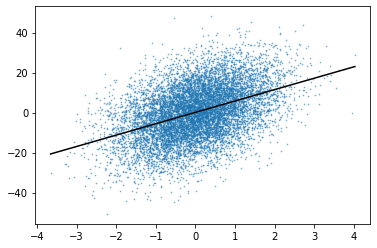

In [54]:
fig, ax = plt.subplots()
ax.scatter(df["x"], df["y"], alpha=.5, s=.5)

x_grid = np.linspace(df["x"].min(), df["x"].max())
ax.plot(x_grid, results.params["const"]+x_grid*results.params["x"], c="black")
